In [65]:
import numpy as np
import random


# make sure to put the `algorithm_test.py` file in the same directory as this file!
from algorithm_test import test_algorithms


In [66]:
def armijo_rule(f, grad, x, d, c1=0.1, beta=0.8):
    # YOUR CODE HERE
    j=0
    step=1
    beta1=0.1
    beta2=0.8

    maxAttemp=1000000
    leftMember=f(x+step*d)
    rightMember=f(x)+c1*step*np.dot(grad(x),d)

    while leftMember>rightMember and maxAttemp>0:
        leftMember=f(x+step*d)
        rightMember=f(x)+c1*step*np.dot(grad(x),d)
        min=beta1*step
        max=beta2*step
        step= random.uniform(min, max)
        maxAttemp=maxAttemp-1
        
        j=j+1
    return step

In [67]:
def powell_wolfe_rule(f,grad,x,d,c1=0.3,c2=0.6):
    # YOUR CODE HERE
    j=0
    step=1
    beta1=0.5
    beta2=0.5

    maxAttemp=1000000
    #lef term of the armijo inequality
    leftMember=f(x+step*d)
    #right term of the armijo inequality
    rightMember=f(x)+c1*step*np.dot(grad(x),d)

    PWLeftMember=grad(x+step*d)*d
    PWRightMember=c2*grad(x)*d
    steps=[1]
    # while armijo rule is not verified
    while leftMember>rightMember and maxAttemp>0:
        leftMember=f(x+step*d)
        rightMember=f(x)+c1*step*np.dot(grad(x),d)
        step= 0.5*step
        maxAttemp=maxAttemp-1
        steps.append(step)
        j=j+1
    #checking Powell Wolfe condition
    PWLeftMember=np.dot(grad(x+step*d),d)
    PWRightMember=c2*np.dot(grad(x),d)
    #print("steps"+ str(steps))
    if(PWLeftMember>PWRightMember):
        print("step is okay for both PW and Arminjo")
    else :
        alpha2=step
        alpha1=steps[len(steps)-1]
        step=0.5*(alpha1+alpha2)
        #checking again if with that step we are okay for arminjo 
        leftMember=f(x+step*d)
        rightMember=f(x)+c1*step*np.dot(grad(x),d)
        if(leftMember<=rightMember):
            step=alpha1
        else:
            step=alpha2





    return step

In [68]:
def gradient_descent(f, grad, x0, eps=1e-6):
    iterates = []
    step_sizes = []
    gradient_norms = []

    # YOUR CODE HERE
    x = x0
    #TO DO POWELL WOLF
    #print("norm x "+ str(np.linalg.norm(x)))
    iterates.append(x0)
    maxAttempt=1000000
    
    while np.linalg.norm(grad(x)) > eps and maxAttempt>0:
        #print('norm of x ' + str(np.linalg.norm(x)))

        d = -grad(x)
        #print('maxAttempt ' + str(maxAttempt))
        #print("value of x" + str(x) )
        # we loook for a good alpha
        step=armijo_rule(f,grad,x,d,0.1,0.8)
        #print("step is " + str(step))
        #print("d grad is  " + str(d))
        #print('f is ' + str(f(x)))

        x =x+step* d
        iterates.append(x)
        step_sizes.append(step)
        gradient_norms.append(np.linalg.norm(grad(x)))

        maxAttempt=maxAttempt-1
    # replace ... in the following statements by the appropriate variable
    #iterates.append(...)  
    # # use this statement to append the current iterate to the list of iterates
    #step_sizes.append(...)  # use this statement to append the current step size to the list of step sizes
    #gradient_norms.append(...)  # use this statement to append the current norm of the gradient to the list of gradient norms
    #print("iterates")
    #print(iterates)

    return {'iterates': iterates, 'step_sizes': step_sizes, 'gradient_norms': gradient_norms}


def gradient_descent_powell_wolfe(f, grad, x0, eps=1e-6):
    iterates = []
    step_sizes = []
    gradient_norms = []

    iterates.append(x0)
    maxAttempt=1000000
    x=x0
    
    while np.linalg.norm(grad(x)) > eps and maxAttempt>0:
        #print('norm of x ' + str(np.linalg.norm(x)))

        d = -grad(x)
        #print('maxAttempt ' + str(maxAttempt))
        #print("value of x" + str(x) )
        # we loook for a good alpha
        step=powell_wolfe_rule(f,grad,x,d,0.3,0.8)
        #print("step is " + str(step))
        #print("d grad is  " + str(d))
        #print('f is ' + str(f(x)))

        x =x+step* d
        iterates.append(x)
        step_sizes.append(step)
        gradient_norms.append(np.linalg.norm(grad(x)))

        maxAttempt=maxAttempt-1
    # replace ... in the following statements by the appropriate variable
    #iterates.append(...)  
    # # use this statement to append the current iterate to the list of iterates
    #step_sizes.append(...)  # use this statement to append the current step size to the list of step sizes
    #gradient_norms.append(...)  # use this statement to append the current norm of the gradient to the list of gradient norms
    #print("iterates")
    #print(iterates)


    return {'iterates': iterates, 'step_sizes': step_sizes, 'gradient_norms': gradient_norms}


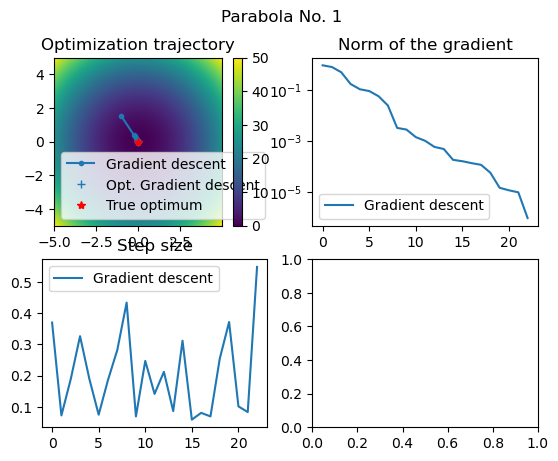

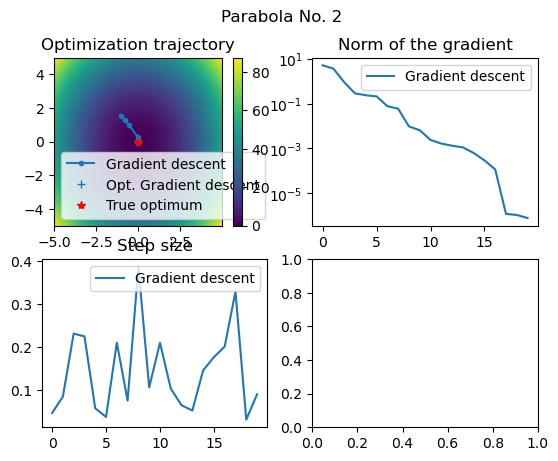

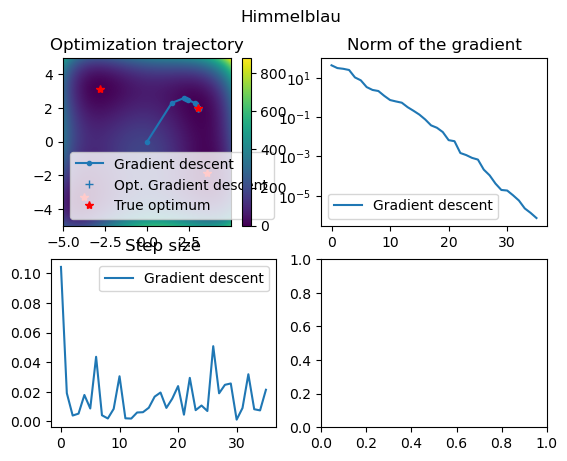

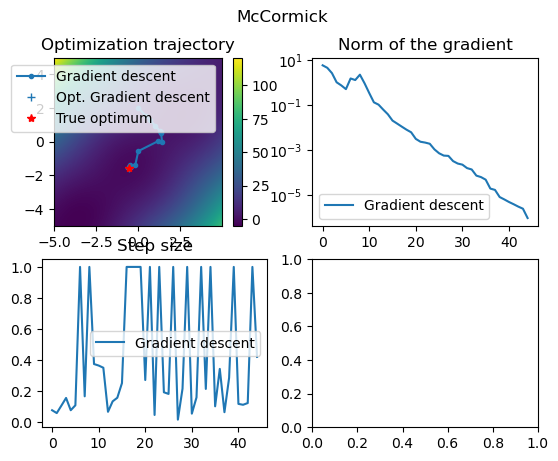

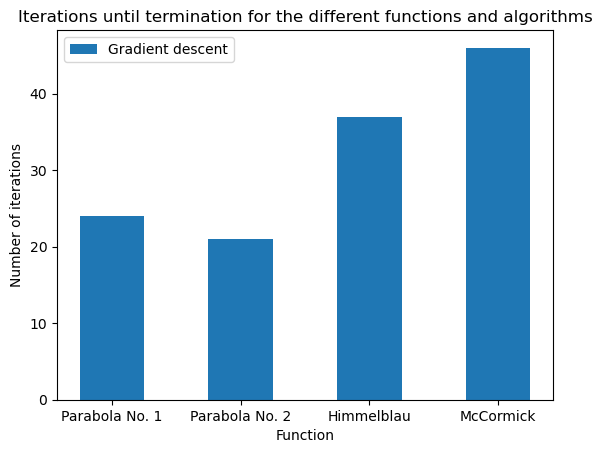

In [69]:
# list of available algorithms
algorithms = [(gradient_descent, "Gradient descent")]

# perform the test of the algorithms on the test instances
test_algorithms(algorithms)


step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
end of descent


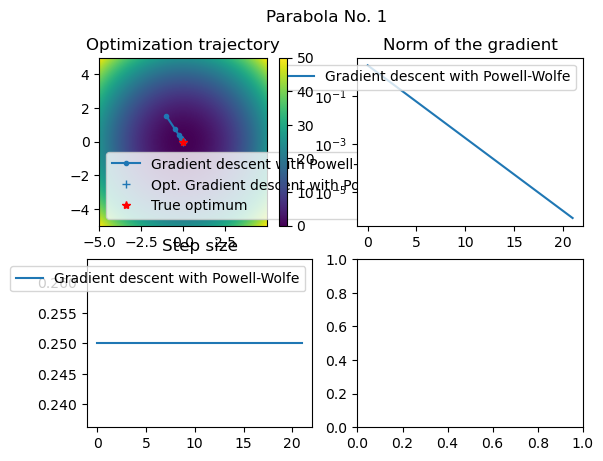

step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
s

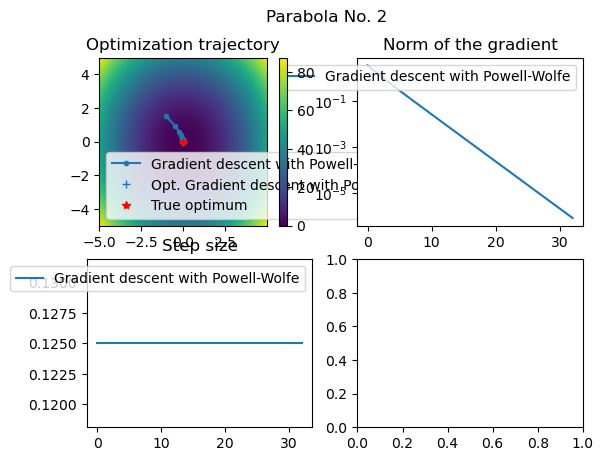

step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
s

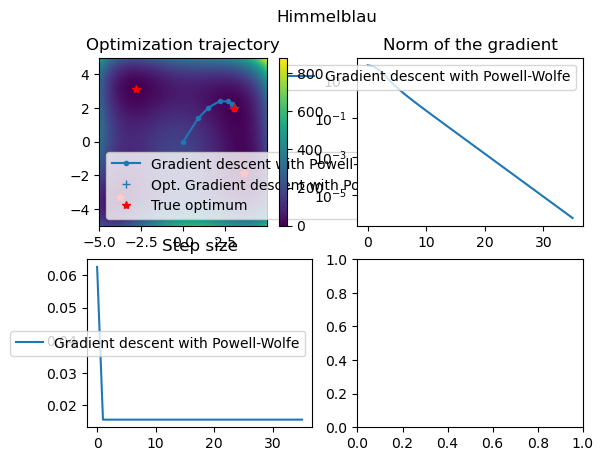

step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
step is okay for both PW and Arminjo
s

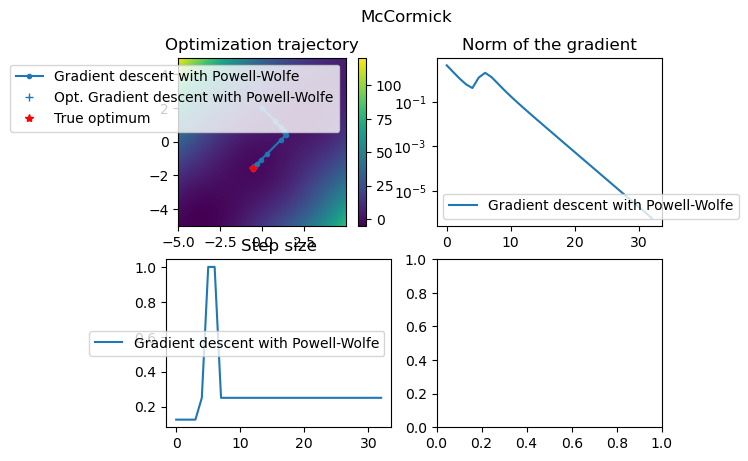

In [70]:
# list of available algorithms
algorithms = [(gradient_descent_powell_wolfe, "Gradient descent with Powell-Wolfe")]

# perform the test of the algorithms on the test instances
test_algorithms(algorithms)